In [ ]:
# Importing File Operations
import numpy as np
import pandas as pd

# Importing Ploting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

In [ ]:
data = pd.read_csv("Diabeties data.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data1 = data.copy()

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.dropna(inplace=True)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.drop_duplicates(inplace=True)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Rename columns using .rename() method
data = data.rename(columns={'BloodPressure': 'Blood_Pressure', 'SkinThickness': 'Skin_Thickness','DiabetesPedigreeFunction' : 'Diabetes_Pedigree_Function'})
data


,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


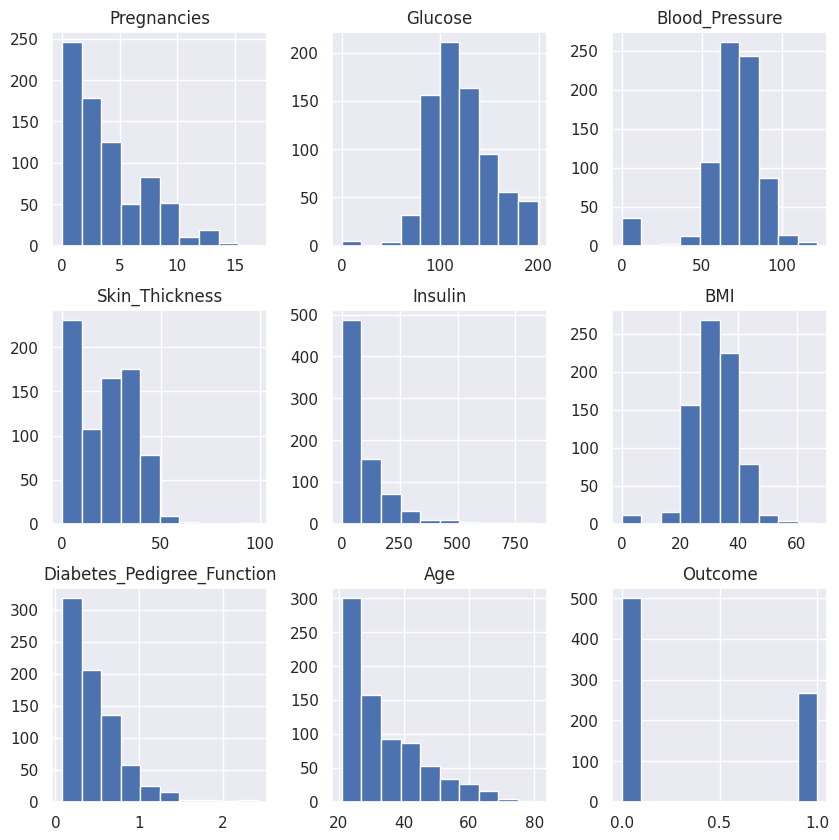

In [ ]:
data.hist(bins = 10,figsize = (10,10))
plt.show()

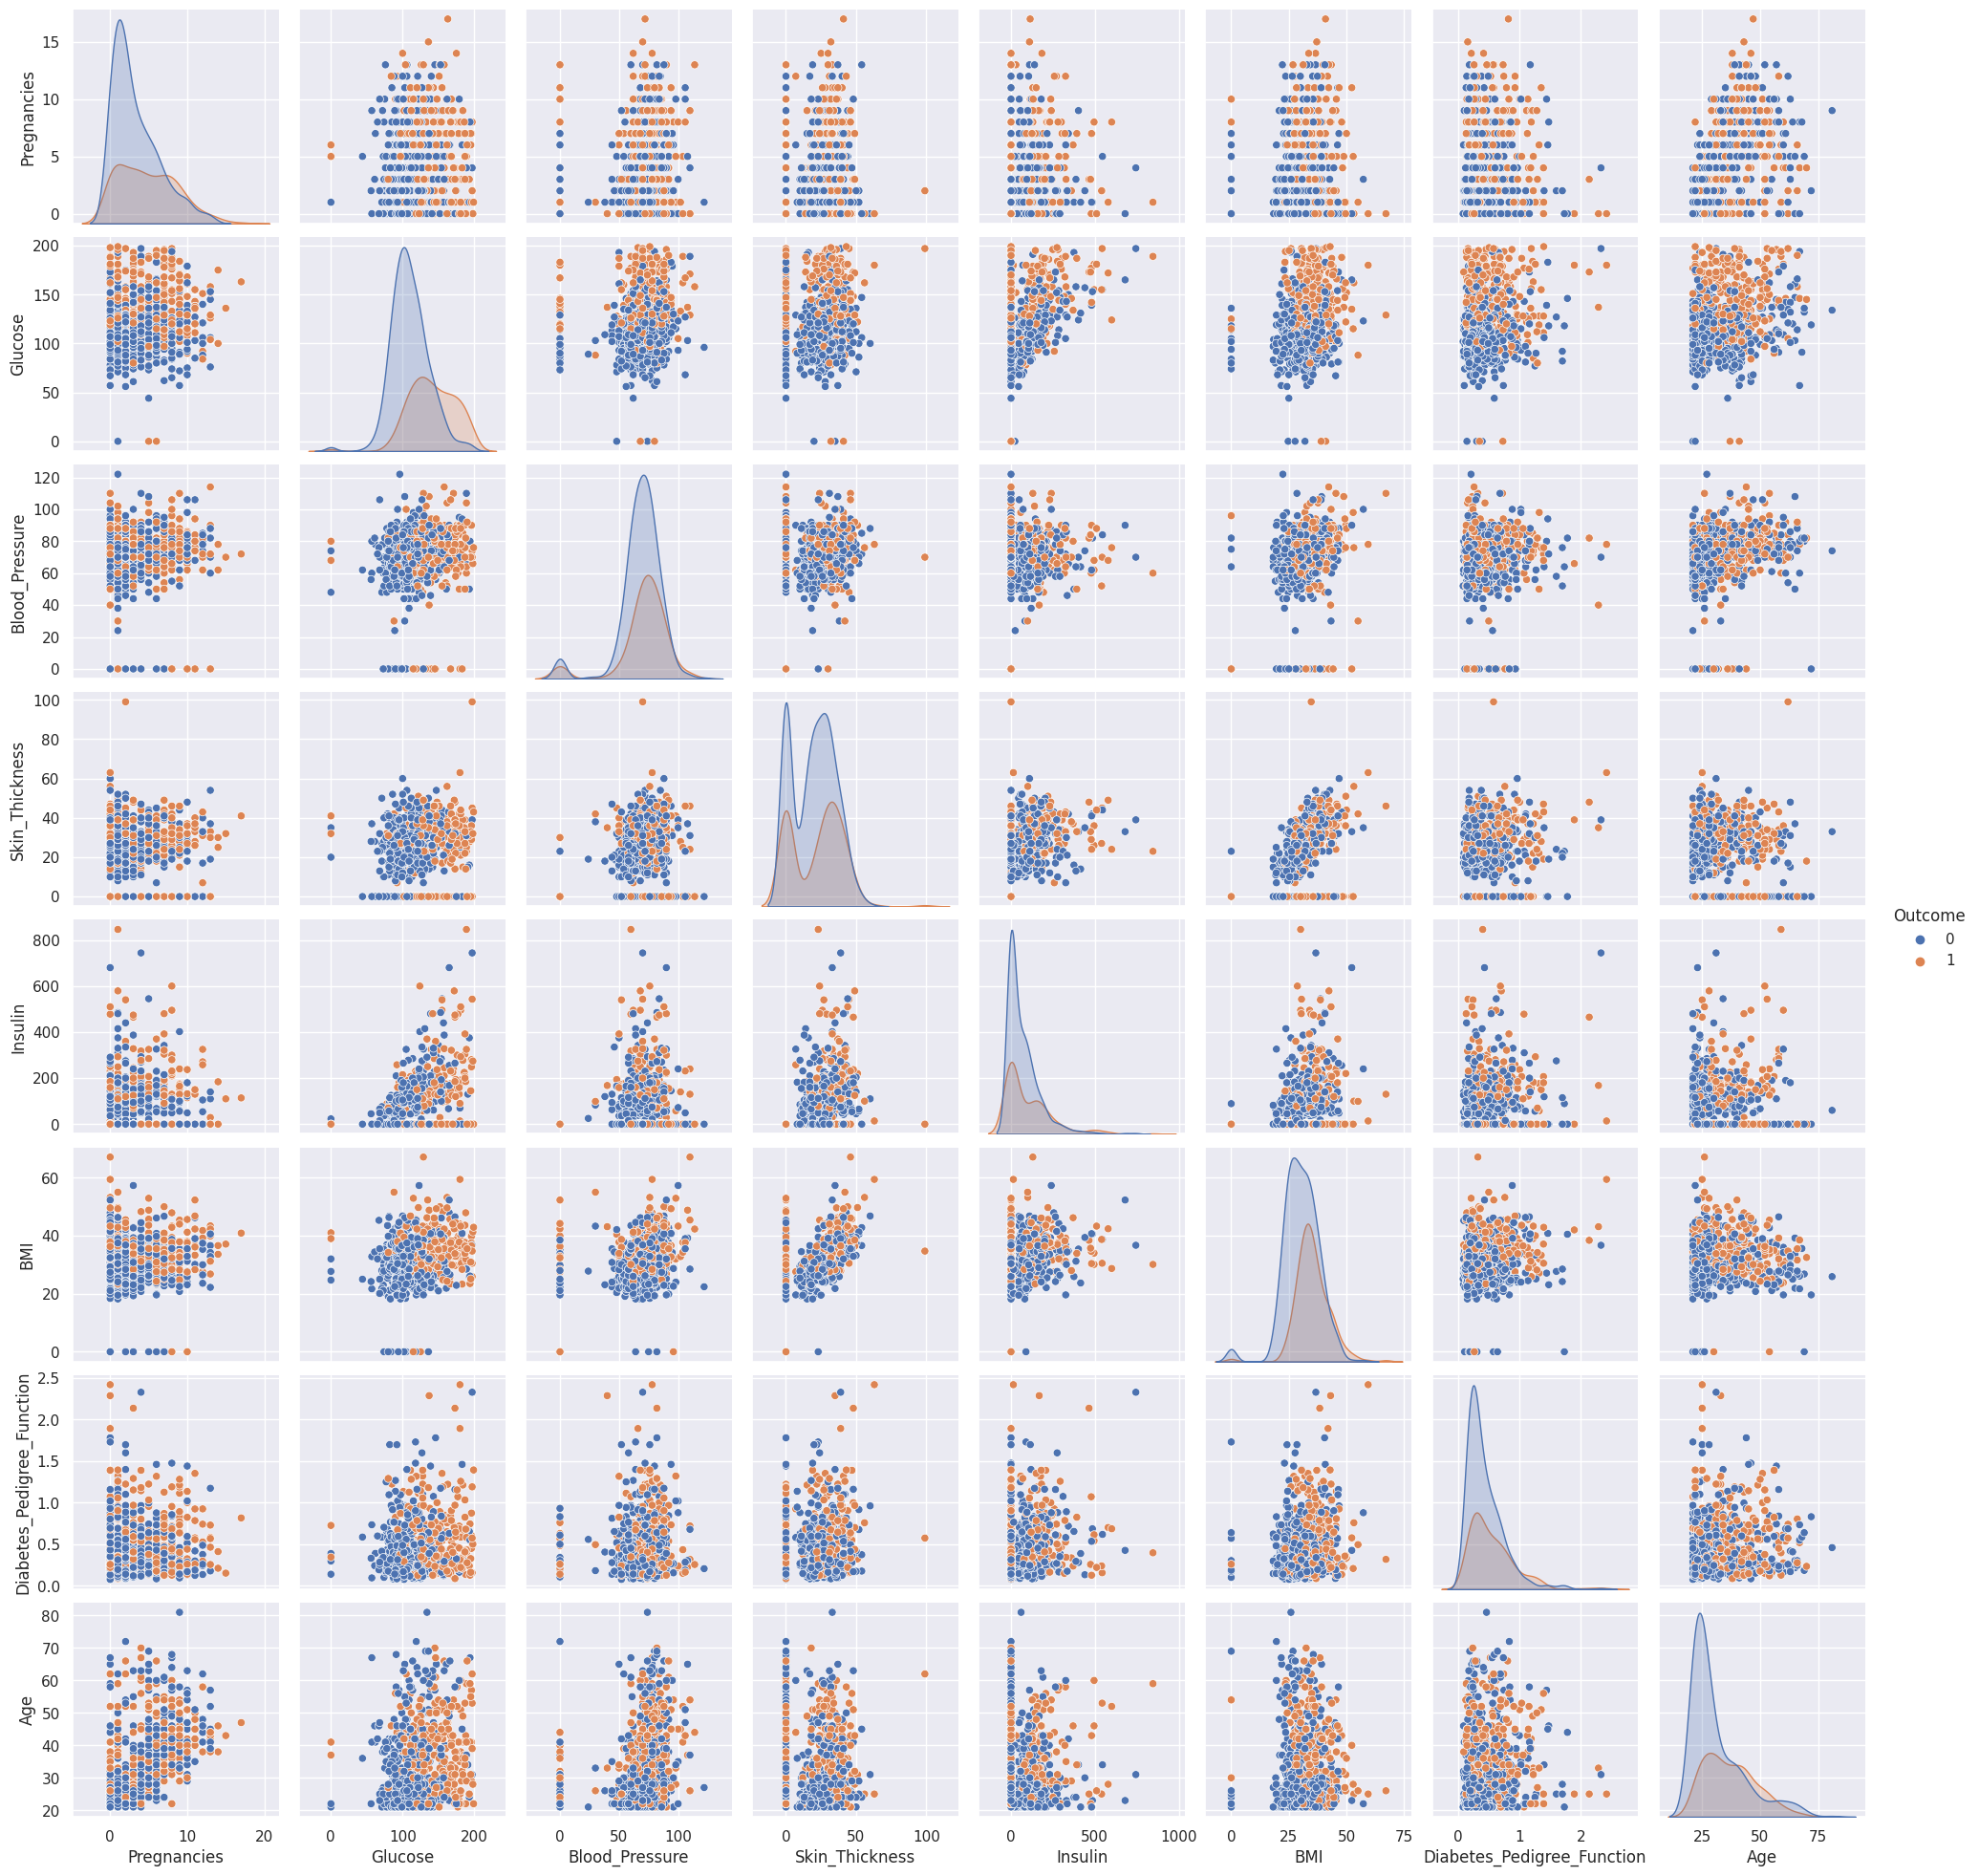

In [ ]:
sns.pairplot(data = data, hue ='Outcome')
plt.show()

In [ ]:
data.to_csv('cleaned_diabetes_data.csv', index=False)

In [ ]:
data.corr()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Blood_Pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Skin_Thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Diabetes_Pedigree_Function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

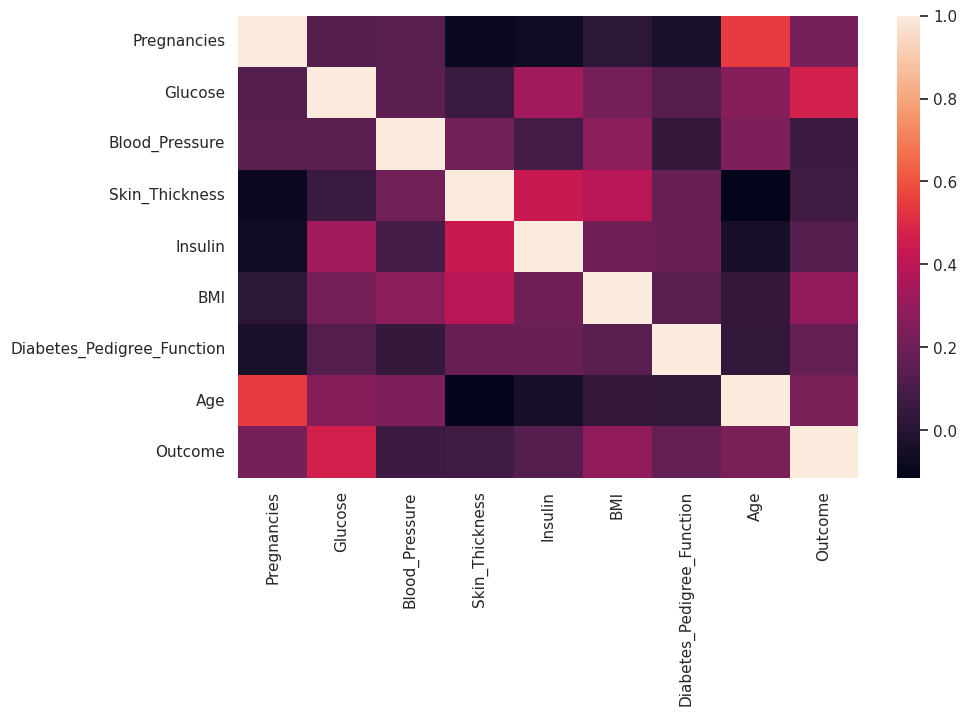

In [ ]:
sns.set()
plt.subplots(figsize=(10,6))
sns.heatmap(data.corr())


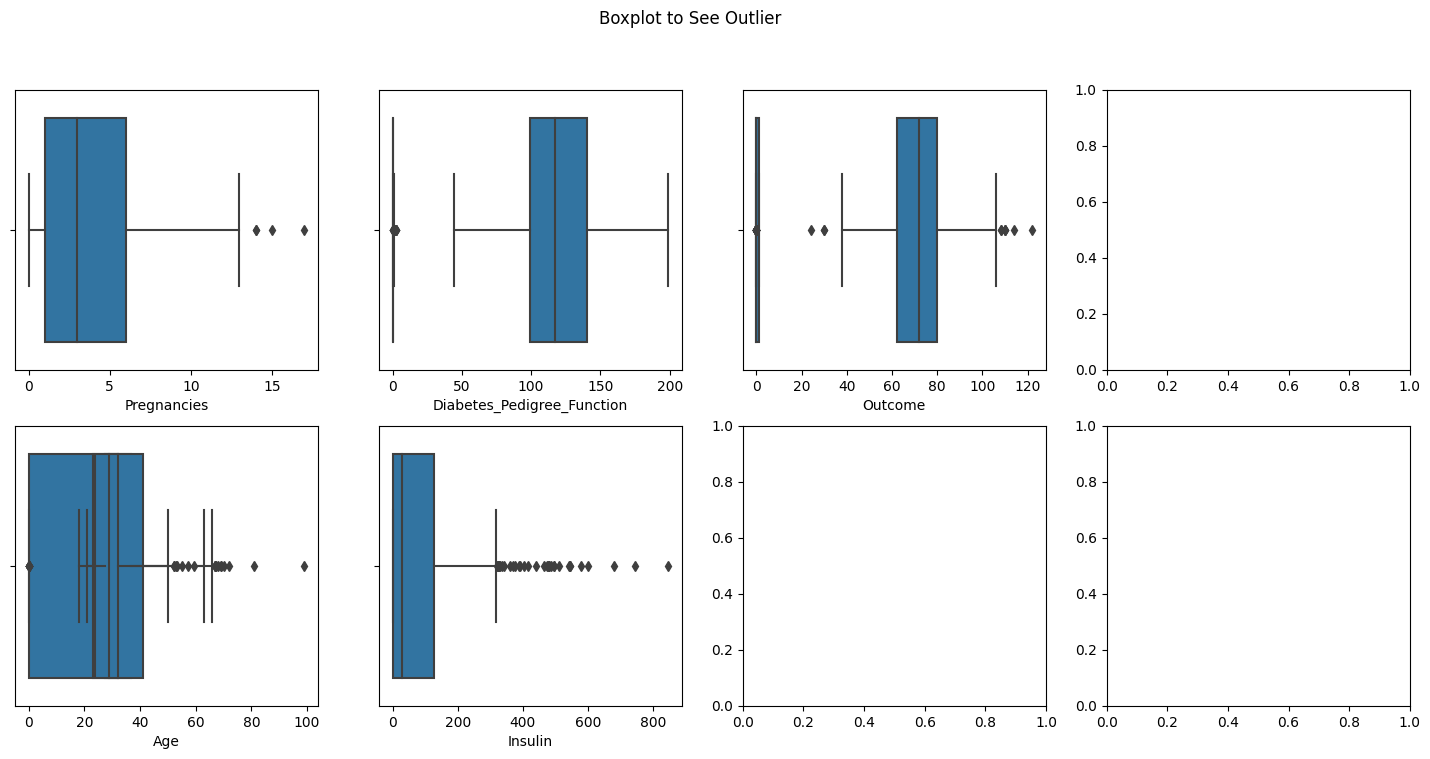

In [ ]:
# Box Plot to see outlier
fig, axes = plt.subplots(2, 4, figsize=(18, 8))

fig.suptitle('Boxplot to See Outlier')

sns.boxplot(ax=axes[0, 0], data=data, x='Pregnancies')
sns.boxplot(ax=axes[0, 1], data=data, x='Glucose')
sns.boxplot(ax=axes[0, 2], data=data, x='Blood_Pressure')
sns.boxplot(ax=axes[1, 0], data=data, x='Skin_Thickness')
sns.boxplot(ax=axes[1, 1], data=data, x='Insulin')
sns.boxplot(ax=axes[1,0], data=data, x='BMI')
sns.boxplot(ax=axes[0,1], data=data, x='Diabetes_Pedigree_Function')
sns.boxplot(ax=axes[1,0], data=data, x='Age')
sns.boxplot(ax=axes[0,2], data=data, x='Outcome')


plt.show()


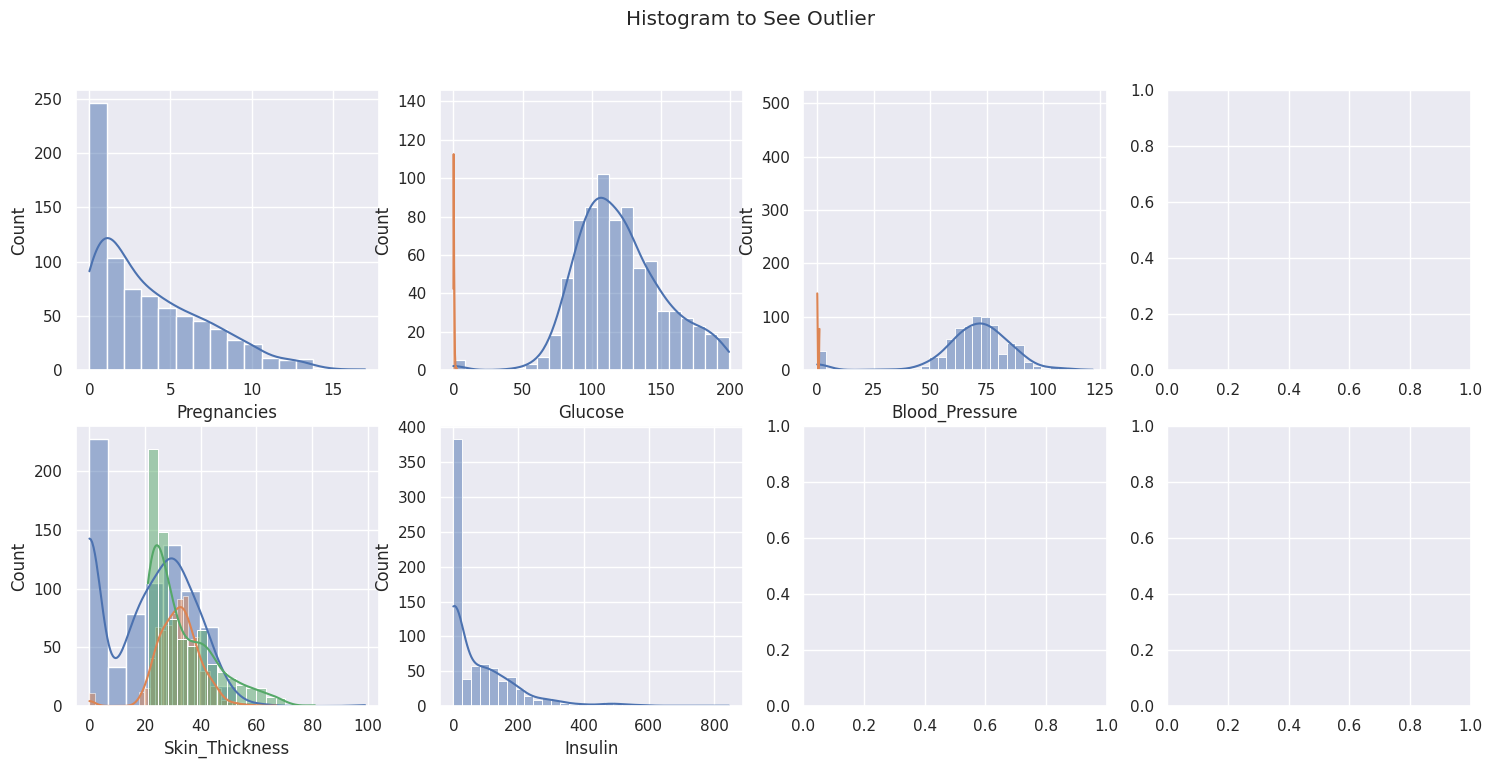

In [ ]:
# Histogram Plot to see outlier
fig, axes = plt.subplots(2, 4, figsize=(18, 8))

fig.suptitle('Histogram to See Outlier')

sns.histplot(ax=axes[0, 0], data=data, x='Pregnancies', kde=True)
sns.histplot(ax=axes[0, 1], data=data, x='Glucose', kde=True)
sns.histplot(ax=axes[0, 2], data=data, x='Blood_Pressure', kde=True)
sns.histplot(ax=axes[1, 0], data=data, x='Skin_Thickness', kde=True)
sns.histplot(ax=axes[1, 1], data=data, x='Insulin', kde=True)
sns.histplot(ax=axes[1,0], data=data, x='BMI', kde=True)
sns.histplot(ax=axes[0,1], data=data, x='Diabetes_Pedigree_Function', kde=True)
sns.histplot(ax=axes[1,0], data=data, x='Age', kde=True)
sns.histplot(ax=axes[0,2], data=data, x='Outcome', kde=True)


plt.show()


#Removing outliers of Pregnancies

In [ ]:
# Calculate the IQR (Interquartile Range)
Q1 = data['Pregnancies'].quantile(0.25)
Q3 = data['Pregnancies'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on the IQR method
data_no_outliers = data[(data['Pregnancies'] >= lower_bound) & (data['Pregnancies'] <= upper_bound)]

print(lower_bound)
print(upper_bound)
print(data_no_outliers)


-6.5
13.5
     Pregnancies  Glucose  Blood_Pressure  Skin_Thickness  Insulin   BMI  \
0              6      148              72              35        0  33.6   
1              1       85              66              29        0  26.6   
2              8      183              64               0        0  23.3   
3              1       89              66              23       94  28.1   
4              0      137              40              35      168  43.1   
..           ...      ...             ...             ...      ...   ...   
763           10      101              76              48      180  32.9   
764            2      122              70              27        0  36.8   
765            5      121              72              23      112  26.2   
766            1      126              60               0        0  30.1   
767            1       93              70              31        0  30.4   

     Diabetes_Pedigree_Function  Age  Outcome  
0                         0.6

#Removing outliers of Glucose

In [ ]:
# Calculate the IQR (Interquartile Range)
Q1 = data['Glucose'].quantile(0.25)
Q3 = data['Glucose'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on the IQR method
data_no_outliers = data[(data['Glucose'] >= lower_bound) & (data['Glucose'] <= upper_bound)]

print(lower_bound)
print(upper_bound)
print(data_no_outliers)

37.125
202.125
     Pregnancies  Glucose  Blood_Pressure  Skin_Thickness  Insulin   BMI  \
0              6      148              72              35        0  33.6   
1              1       85              66              29        0  26.6   
2              8      183              64               0        0  23.3   
3              1       89              66              23       94  28.1   
4              0      137              40              35      168  43.1   
..           ...      ...             ...             ...      ...   ...   
763           10      101              76              48      180  32.9   
764            2      122              70              27        0  36.8   
765            5      121              72              23      112  26.2   
766            1      126              60               0        0  30.1   
767            1       93              70              31        0  30.4   

     Diabetes_Pedigree_Function  Age  Outcome  
0                       

#Removing outliers of Blood_Pressure  

In [ ]:
# Calculate the IQR (Interquartile Range)
Q1 = data['Blood_Pressure'].quantile(0.25)
Q3 = data['Blood_Pressure'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on the IQR method
data_no_outliers = data[(data['Blood_Pressure'] >= lower_bound) & (data['Blood_Pressure'] <= upper_bound)]

print(lower_bound)
print(upper_bound)
print(data_no_outliers)

35.0
107.0
     Pregnancies  Glucose  Blood_Pressure  Skin_Thickness  Insulin   BMI  \
0              6      148              72              35        0  33.6   
1              1       85              66              29        0  26.6   
2              8      183              64               0        0  23.3   
3              1       89              66              23       94  28.1   
4              0      137              40              35      168  43.1   
..           ...      ...             ...             ...      ...   ...   
763           10      101              76              48      180  32.9   
764            2      122              70              27        0  36.8   
765            5      121              72              23      112  26.2   
766            1      126              60               0        0  30.1   
767            1       93              70              31        0  30.4   

     Diabetes_Pedigree_Function  Age  Outcome  
0                         0.

#Removing outliers of Skin_Thickness  

In [ ]:
# Calculate the IQR (Interquartile Range)
Q1 = data['Skin_Thickness'].quantile(0.25)
Q3 = data['Skin_Thickness'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on the IQR method
data_no_outliers = data[(data['Skin_Thickness'] >= lower_bound) & (data['Skin_Thickness'] <= upper_bound)]

print(lower_bound)
print(upper_bound)
print(data_no_outliers)

-48.0
80.0
     Pregnancies  Glucose  Blood_Pressure  Skin_Thickness  Insulin   BMI  \
0              6      148              72              35        0  33.6   
1              1       85              66              29        0  26.6   
2              8      183              64               0        0  23.3   
3              1       89              66              23       94  28.1   
4              0      137              40              35      168  43.1   
..           ...      ...             ...             ...      ...   ...   
763           10      101              76              48      180  32.9   
764            2      122              70              27        0  36.8   
765            5      121              72              23      112  26.2   
766            1      126              60               0        0  30.1   
767            1       93              70              31        0  30.4   

     Diabetes_Pedigree_Function  Age  Outcome  
0                         0.

#Removing outliers of Insulin

In [ ]:
# Calculate the IQR (Interquartile Range)
Q1 = data['Insulin'].quantile(0.25)
Q3 = data['Insulin'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on the IQR method
data_no_outliers = data[(data['Insulin'] >= lower_bound) & (data['Insulin'] <= upper_bound)]

print(lower_bound)
print(upper_bound)
print(data_no_outliers)

-190.875
318.125
     Pregnancies  Glucose  Blood_Pressure  Skin_Thickness  Insulin   BMI  \
0              6      148              72              35        0  33.6   
1              1       85              66              29        0  26.6   
2              8      183              64               0        0  23.3   
3              1       89              66              23       94  28.1   
4              0      137              40              35      168  43.1   
..           ...      ...             ...             ...      ...   ...   
763           10      101              76              48      180  32.9   
764            2      122              70              27        0  36.8   
765            5      121              72              23      112  26.2   
766            1      126              60               0        0  30.1   
767            1       93              70              31        0  30.4   

     Diabetes_Pedigree_Function  Age  Outcome  
0                     

#Removing outliers of BMI

In [ ]:
# Calculate the IQR (Interquartile Range)
Q1 = data['BMI'].quantile(0.25)
Q3 = data['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on the IQR method
data_no_outliers = data[(data['BMI'] >= lower_bound) & (data['BMI'] <= upper_bound)]

print(lower_bound)
print(upper_bound)
print(data_no_outliers)

13.35
50.550000000000004
     Pregnancies  Glucose  Blood_Pressure  Skin_Thickness  Insulin   BMI  \
0              6      148              72              35        0  33.6   
1              1       85              66              29        0  26.6   
2              8      183              64               0        0  23.3   
3              1       89              66              23       94  28.1   
4              0      137              40              35      168  43.1   
..           ...      ...             ...             ...      ...   ...   
763           10      101              76              48      180  32.9   
764            2      122              70              27        0  36.8   
765            5      121              72              23      112  26.2   
766            1      126              60               0        0  30.1   
767            1       93              70              31        0  30.4   

     Diabetes_Pedigree_Function  Age  Outcome  
0             

#Removing outliers of Diabetes_Pedigree_Function  

In [ ]:
# Calculate the IQR (Interquartile Range)
Q1 = data['Diabetes_Pedigree_Function'].quantile(0.25)
Q3 = data['Diabetes_Pedigree_Function'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on the IQR method
data_no_outliers = data[(data['Diabetes_Pedigree_Function'] >= lower_bound) & (data['Diabetes_Pedigree_Function'] <= upper_bound)]

print(lower_bound)
print(upper_bound)
print(data_no_outliers)

-0.32999999999999996
1.2
     Pregnancies  Glucose  Blood_Pressure  Skin_Thickness  Insulin   BMI  \
0              6      148              72              35        0  33.6   
1              1       85              66              29        0  26.6   
2              8      183              64               0        0  23.3   
3              1       89              66              23       94  28.1   
5              5      116              74               0        0  25.6   
..           ...      ...             ...             ...      ...   ...   
763           10      101              76              48      180  32.9   
764            2      122              70              27        0  36.8   
765            5      121              72              23      112  26.2   
766            1      126              60               0        0  30.1   
767            1       93              70              31        0  30.4   

     Diabetes_Pedigree_Function  Age  Outcome  
0             

#Removing outliers of Age  

In [ ]:
# Calculate the IQR (Interquartile Range)
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on the IQR method
data_no_outliers = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

print(lower_bound)
print(upper_bound)
print(data_no_outliers)

-1.5
66.5
     Pregnancies  Glucose  Blood_Pressure  Skin_Thickness  Insulin   BMI  \
0              6      148              72              35        0  33.6   
1              1       85              66              29        0  26.6   
2              8      183              64               0        0  23.3   
3              1       89              66              23       94  28.1   
4              0      137              40              35      168  43.1   
..           ...      ...             ...             ...      ...   ...   
763           10      101              76              48      180  32.9   
764            2      122              70              27        0  36.8   
765            5      121              72              23      112  26.2   
766            1      126              60               0        0  30.1   
767            1       93              70              31        0  30.4   

     Diabetes_Pedigree_Function  Age  Outcome  
0                         0.6

In [ ]:
data_no_outliers

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
